In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

household = pd.read_csv('/content/drive/MyDrive/household_level_data.csv')
person = pd.read_csv('/content/drive/MyDrive/person_level_data.csv')
training = pd.read_csv('/content/drive/MyDrive/training_set_data.csv')
unlabeled = pd.read_csv('/content/drive/MyDrive/unlabeled_data.csv')

In [2]:
hh = household.pivot_table(index='household_id', columns='variable', values='value').reset_index()

In [3]:
household

,household_id,variable,value
0,5,hh_income,90334.0
1,5,hh_size,2.0
2,5,num_children,0.0
3,9,hh_income,66216.0
4,9,hh_size,2.0
...,...,...,...
32953,55141,hh_size,2.0
32954,55141,num_children,0.0
32955,55148,hh_income,41676.0
32956,55148,hh_size,1.0


In [4]:
household.head(10)

,household_id,variable,value
0,5,hh_income,90334.0
1,5,hh_size,2.0
2,5,num_children,0.0
3,9,hh_income,66216.0
4,9,hh_size,2.0
5,9,num_children,0.0
6,22,hh_income,84614.0
7,22,hh_size,3.0
8,22,num_children,0.0
9,31,hh_income,60285.0


In [5]:
household.shape

(32958, 3)

In [6]:
household.isnull().sum()

household_id    0
variable        0
value           0
dtype: int64

In [7]:
person.head()

,person_id,age,citizen_status,nativity_status,weekly_hours_worked,marital_status,school_status,sex,when_last_worked,worked_last_week,language,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,uninsured,household_id,hh_income_pct
0,10,62,citizen_birth,native_born,55,married,not_student,FEMALE,in_last_year,worked,English,0,0,0,0,0,1,0,0,5,0.389078
1,11,65,citizen_birth,native_born,40,married,not_student,M,in_last_year,worked,English,0,0,0,0,0,1,0,0,5,0.610922
2,15,70,citizen_birth,native_born,0,married,not_student,MALE,over_five_years_ago,did_not_work,English,0,0,0,0,0,1,0,0,9,0.735381
3,16,70,citizen_birth,native_born,20,married,not_student,F,in_last_year,did_not_work,English,0,0,0,0,0,1,0,0,9,0.264619
4,43,75,citizen_birth,native_born,0,married,not_student,FEMALE,over_five_years_ago,not_reported,English,0,0,0,0,0,1,0,0,22,0.250230


In [8]:
person.shape

(19897, 21)

In [9]:
person.isnull().sum()

person_id                0
age                      0
citizen_status           0
nativity_status          0
weekly_hours_worked      0
marital_status           0
school_status            0
sex                      0
when_last_worked         0
worked_last_week         0
language                 0
race_native_american     0
race_asian               0
race_black               0
race_native_hawaiian     0
race_pacific_islander    0
race_white               0
race_other               0
uninsured                0
household_id             0
hh_income_pct            0
dtype: int64

In [10]:
unlabeled.head()

,person_id,age,citizen_status,nativity_status,weekly_hours_worked,total_income,self_employed_income,wage_income,interest_income,other_income,marital_status,school_status,sex,when_last_worked,worked_last_week,language,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,household_id
0,12,28,citizen_birth,native_born,45,15254.0,15081.0,82.0,16.0,75.0,never_married,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,6
1,13,40,citizen_birth,native_born,32,10291.0,45.0,9068.0,57.0,1121.0,divorced,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,7
2,22,68,citizen_birth,native_born,0,13194.0,80.0,34.0,69.0,13011.0,married,not_student,MALE,over_five_years_ago,did_not_work,English,0,0,0,0,0,1,0,13
3,23,64,citizen_birth,native_born,40,30194.0,33.0,30094.0,37.0,30.0,married,not_student,F,in_last_year,worked,English,0,0,0,0,0,1,0,13
4,25,29,citizen_birth,native_born,40,52174.0,12.0,52101.0,52.0,9.0,never_married,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,15


In [11]:
unlabeled.shape

(20172, 24)

In [12]:
unlabeled.isnull().sum()

person_id                0
age                      0
citizen_status           0
nativity_status          0
weekly_hours_worked      0
total_income             0
self_employed_income     0
wage_income              0
interest_income          0
other_income             0
marital_status           0
school_status            0
sex                      0
when_last_worked         0
worked_last_week         0
language                 0
race_native_american     0
race_asian               0
race_black               0
race_native_hawaiian     0
race_pacific_islander    0
race_white               0
race_other               0
household_id             0
dtype: int64

# Section 1 Exploratory Data Analysis

In [13]:
person['sex'].value_counts()

FEMALE    7223
MALE      6735
F         2056
M         1930
female    1017
male       936
Name: sex, dtype: int64

In [14]:
person['sex'].replace({'FEMALE': 'female', 'F': 'female', 'MALE': 'male', 'M': 'male'}, inplace=True)
person['sex'].value_counts()
person = pd.get_dummies(person, columns=['sex'])
person.head()

,person_id,age,citizen_status,nativity_status,weekly_hours_worked,marital_status,school_status,when_last_worked,worked_last_week,language,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,uninsured,household_id,hh_income_pct,sex_female,sex_male
0,10,62,citizen_birth,native_born,55,married,not_student,in_last_year,worked,English,0,0,0,0,0,1,0,0,5,0.389078,1,0
1,11,65,citizen_birth,native_born,40,married,not_student,in_last_year,worked,English,0,0,0,0,0,1,0,0,5,0.610922,0,1
2,15,70,citizen_birth,native_born,0,married,not_student,over_five_years_ago,did_not_work,English,0,0,0,0,0,1,0,0,9,0.735381,0,1
3,16,70,citizen_birth,native_born,20,married,not_student,in_last_year,did_not_work,English,0,0,0,0,0,1,0,0,9,0.264619,1,0
4,43,75,citizen_birth,native_born,0,married,not_student,over_five_years_ago,not_reported,English,0,0,0,0,0,1,0,0,22,0.250230,1,0


In [15]:
# average weekly hours worked among men and women

weekly_hours_female = person[person['sex_female'] == 1]['weekly_hours_worked']
avg_weekly_hours_female = np.mean(weekly_hours_female)
print('The average weekly hours worked by women is', round(avg_weekly_hours_female, 1))

weekly_hours_male = person[person['sex_male'] == 1]['weekly_hours_worked']
avg_weekly_hours_male = np.mean(weekly_hours_male)
print('The average weekly hours worked by men is', round(avg_weekly_hours_male, 1))

weekly_hours = np.mean(person['weekly_hours_worked'])
round(weekly_hours, 1)

The average weekly hours worked by women is 21.7
The average weekly hours worked by men is 28.7


25.1

In [16]:
#household_pivot = household.pivot_table(index=['household_id'], columns=['variable'], values=['value']).reset_index()
#household_pivot.head()


In [17]:
household_income_value = household[household['variable'] == 'hh_income']
#print(household_income_value)
household_income = household_income_value.drop(['variable'], axis=1)
hh_income_dict = dict(zip(household_income['household_id'], household_income['value']))

In [18]:
# three households with highest per person income
person_income = person[['person_id', 'household_id', 'hh_income_pct']]
#print(person_income)
income = []
for idx, row in person_income.iterrows():
  id = row['household_id']
  pct = row['hh_income_pct']
  income.append(np.multiply(pct, hh_income_dict[id]))

In [19]:
person_income['income'] = income
person_income.sort_values(by=['income'], ascending=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,person_id,household_id,hh_income_pct,income
3563,23355,10110,0.955742,1060273.0
14109,89429,38870,1.000000,840245.0
12874,82159,35657,0.999787,815297.0
17729,112913,49171,0.975296,815263.0
9038,57569,24934,0.730872,815220.0
...,...,...,...,...
266,1886,813,0.001460,50.0
16060,102295,44478,0.000945,38.0
1991,12695,5486,0.000250,37.0
11259,71959,31221,0.000430,26.0


In [20]:
person['marital_status'].value_counts()

married          10910
never_married     5335
divorced          1980
widowed           1376
separated          296
Name: marital_status, dtype: int64

In [21]:
married_age = person[person['marital_status'] == 'married']['age']
print('The 80th percentile age of married people is', int(np.percentile(married_age, 80)))

never_married_age = person[person['marital_status'] == 'never_married']['age']
print('The 80th percentile age of people who were never married is', int(np.percentile(never_married_age, 80)))

divorced_age = person[person['marital_status'] == 'divorced']['age']
print('The 80th percentile age of divorced people is', int(np.percentile(divorced_age, 80)))

widowed_age = person[person['marital_status'] == 'widowed']['age']
print('The 80th percentile age of widowed people is', int(np.percentile(widowed_age, 80)))

separated_age = person[person['marital_status'] == 'separated']['age']
print('The 80th percentile age of people with a marriage status "separated" is', int(np.percentile(separated_age, 80)))

The 80th percentile age of married people is 67
The 80th percentile age of people who were never married is 45
The 80th percentile age of divorced people is 67
The 80th percentile age of widowed people is 86
The 80th percentile age of people with a marriage status "separated" is 61


#Section 2 Modeling

In [22]:
training.shape

(59597, 25)

In [23]:
training.head()

,person_id,age,citizen_status,nativity_status,weekly_hours_worked,total_income,self_employed_income,wage_income,interest_income,other_income,marital_status,school_status,sex,when_last_worked,worked_last_week,language,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,uninsured,household_id
0,1,45,citizen_birth,native_born,15,908.0,62.0,800.0,11.0,35.0,married,not_student,FEMALE,in_last_year,worked,English,0,0,0,0,0,1,0,0,1
1,2,47,citizen_birth,native_born,50,180499.0,49.0,160007.0,20424.0,19.0,married,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,0,1
2,4,26,citizen_birth,native_born,0,7367.0,93.0,4.0,20.0,7250.0,never_married,not_student,male,over_five_years_ago,not_reported,English,0,0,1,0,0,0,0,0,2
3,5,42,citizen_naturalized,foreign_born,0,22970.0,51.0,46.0,283.0,22590.0,never_married,public_school,MALE,in_last_five_years,did_not_work,Korean,0,1,0,0,0,0,0,0,3
4,6,79,citizen_naturalized,foreign_born,0,7941.0,23.0,94.0,73.0,7751.0,married,not_student,MALE,over_five_years_ago,did_not_work,Korean,0,1,0,0,0,0,0,0,3


In [24]:
training.isnull().sum()

person_id                0
age                      0
citizen_status           0
nativity_status          0
weekly_hours_worked      0
total_income             0
self_employed_income     0
wage_income              0
interest_income          0
other_income             0
marital_status           0
school_status            0
sex                      0
when_last_worked         0
worked_last_week         0
language                 0
race_native_american     0
race_asian               0
race_black               0
race_native_hawaiian     0
race_pacific_islander    0
race_white               0
race_other               0
uninsured                0
household_id             0
dtype: int64

In [25]:
unlabeled.head()

,person_id,age,citizen_status,nativity_status,weekly_hours_worked,total_income,self_employed_income,wage_income,interest_income,other_income,marital_status,school_status,sex,when_last_worked,worked_last_week,language,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,household_id
0,12,28,citizen_birth,native_born,45,15254.0,15081.0,82.0,16.0,75.0,never_married,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,6
1,13,40,citizen_birth,native_born,32,10291.0,45.0,9068.0,57.0,1121.0,divorced,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,7
2,22,68,citizen_birth,native_born,0,13194.0,80.0,34.0,69.0,13011.0,married,not_student,MALE,over_five_years_ago,did_not_work,English,0,0,0,0,0,1,0,13
3,23,64,citizen_birth,native_born,40,30194.0,33.0,30094.0,37.0,30.0,married,not_student,F,in_last_year,worked,English,0,0,0,0,0,1,0,13
4,25,29,citizen_birth,native_born,40,52174.0,12.0,52101.0,52.0,9.0,never_married,not_student,MALE,in_last_year,worked,English,0,0,0,0,0,1,0,15


In [26]:
# encode 'sex' variable
training['sex'].replace({'FEMALE': 'female', 'F': 'female', 'MALE': 'male', 'M': 'male'}, inplace=True)
training['sex'].value_counts()
#training = pd.get_dummies(training, columns=['sex'])
#training.head()

female    30834
male      28763
Name: sex, dtype: int64

In [27]:
categoricals = training.dtypes == object
cat_cols = training.columns[categoricals].tolist()

ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
ohe.fit(training[cat_cols])
cat_ohe = ohe.transform(training[cat_cols])

ohe_df = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names(input_features = cat_cols))

encoded = pd.concat([training, ohe_df], axis=1).drop(columns = cat_cols, axis=1)

encoded.head()


,person_id,age,weekly_hours_worked,total_income,self_employed_income,wage_income,interest_income,other_income,race_native_american,race_asian,race_black,race_native_hawaiian,race_pacific_islander,race_white,race_other,uninsured,household_id,citizen_status_citizen_birth,citizen_status_citizen_naturalized,citizen_status_noncitizen,nativity_status_foreign_born,nativity_status_native_born,marital_status_divorced,marital_status_married,marital_status_never_married,marital_status_separated,marital_status_widowed,school_status_not_student,school_status_private_school,school_status_public_school,sex_female,sex_male,when_last_worked_in_last_five_years,when_last_worked_in_last_year,when_last_worked_over_five_years_ago,worked_last_week_did_not_work,worked_last_week_not_reported,worked_last_week_worked,language_Afrikaans,language_Albanian,...,language_Nepali,language_Norwegian,language_Ojibwa,language_Other Algonquian languages,language_Other Asian languages,language_Other Indo-European languages,language_Other Specified North American Indian languages,language_Other languages,language_Other specified African languages,language_Pakistan N.E.C.,language_Panjabi,language_Pashto,language_Patois,language_Pennsylvania Dutch,language_Persian,language_Polish,language_Portuguese,language_Romanian,language_Russian,language_Sebuano,language_Serbian,language_Serbo-Croatian,language_Sindhi,language_Sinhalese,language_Slovak,language_South/Central American Indian languages,language_Spanish,language_Swahili,language_Swedish,language_Syriac,language_Tagalog,language_Tamil,language_Telugu,language_Thai,language_Turkish,language_Uighur,language_Ukrainian,language_Urdu,language_Vietnamese,language_Yiddish
0,1,45,15,908.0,62.0,800.0,11.0,35.0,0,0,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,47,50,180499.0,49.0,160007.0,20424.0,19.0,0,0,0,0,0,1,0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,26,0,7367.0,93.0,4.0,20.0,7250.0,0,0,1,0,0,0,0,0,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,42,0,22970.0,51.0,46.0,283.0,22590.0,0,1,0,0,0,0,0,0,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,79,0,7941.0,23.0,94.0,73.0,7751.0,0,1,0,0,0,0,0,0,3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


uninsured
0    54977
1     4620
Name: uninsured, dtype: int64


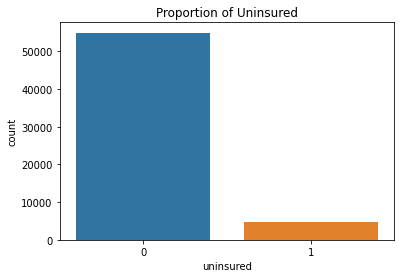

In [28]:
print(training.groupby(['uninsured']).uninsured.count())
plt.title('Proportion of Uninsured')
sns.countplot(x=training.uninsured)
plt.show()

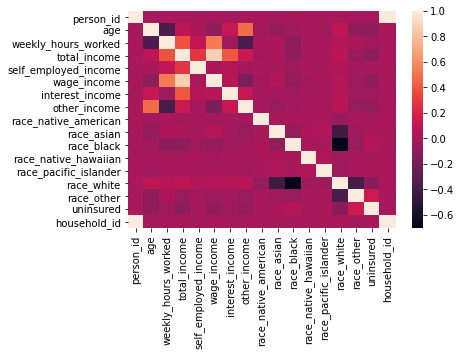

In [29]:
sns.heatmap(training.corr())

In [30]:
# encode the other categorical variables
#encoded = pd.get_dummies(training, columns=['citizen_status', 'nativity_status', 'marital_status', 'school_status', 'when_last_worked', 'worked_last_week', 'language'])
#encoded

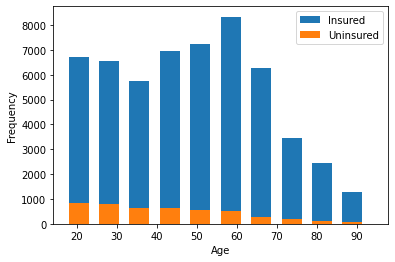

In [31]:
# Majority of people who are insured are around 60 years old
# Most people who are uninsured are 18-50 years old
insured_age_plt = plt.hist(training.age[training.uninsured == 0], width = 5)
uninsured_age_plt = plt.hist(training.age[training.uninsured == 1], width = 5)
plt.legend(('Insured', 'Uninsured'))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

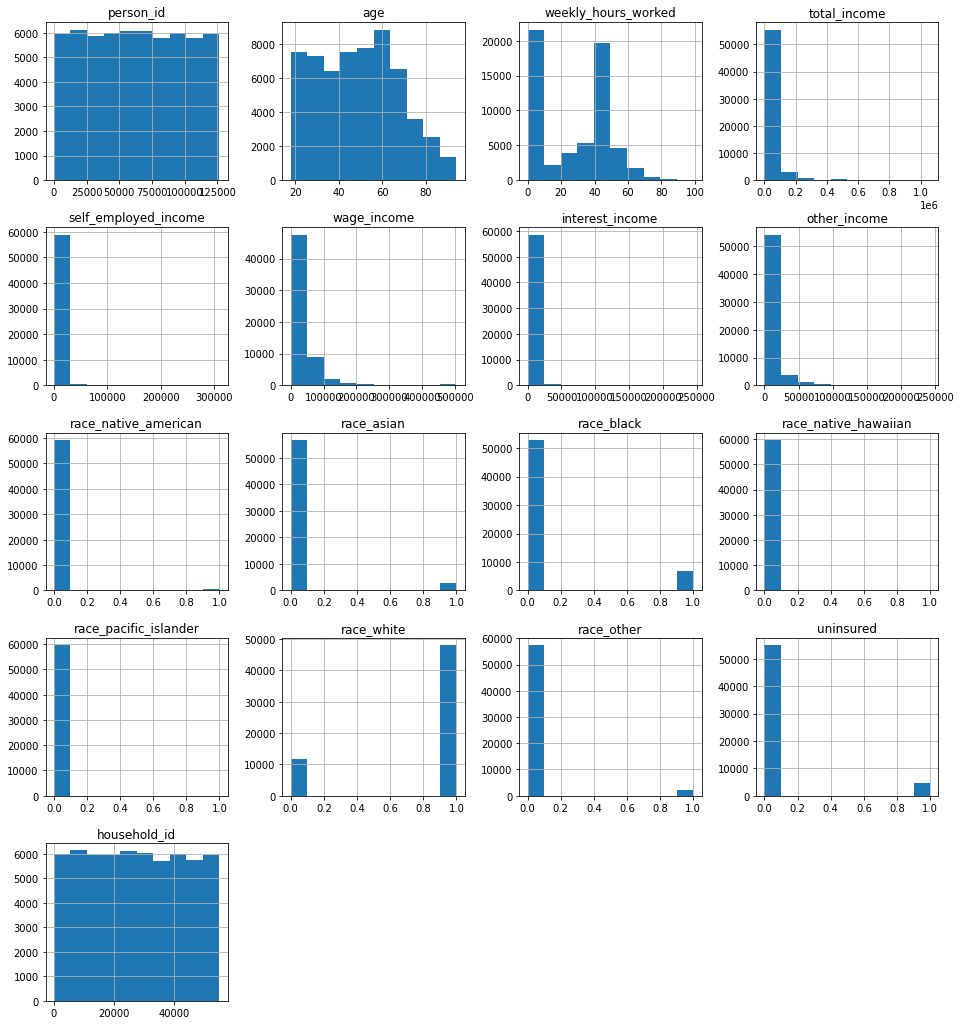

In [32]:
training.hist(figsize = (16,18))
plt.show()

In [33]:
target = encoded['uninsured']
features = encoded.drop(['uninsured', 'person_id'], axis=1)

In [34]:
features.columns

Index(['age', 'weekly_hours_worked', 'total_income', 'self_employed_income',
       'wage_income', 'interest_income', 'other_income',
       'race_native_american', 'race_asian', 'race_black',
       ...
       'language_Tagalog', 'language_Tamil', 'language_Telugu',
       'language_Thai', 'language_Turkish', 'language_Uighur',
       'language_Ukrainian', 'language_Urdu', 'language_Vietnamese',
       'language_Yiddish'],
      dtype='object', length=127)

In [35]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=1)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(metrics.classification_report(y_test, predictions))

Accuracy: 92.60%
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18186
           1       0.55      0.10      0.17      1482

    accuracy                           0.93     19668
   macro avg       0.74      0.55      0.56     19668
weighted avg       0.90      0.93      0.90     19668



In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=1)
log_model = LogisticRegression(max_iter=4000)
log_model.fit(X_train, y_train)
# evaluate the model
yhat = log_model.predict(X_test)
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 92.52


In [37]:
print(metrics.confusion_matrix(y_test, yhat))
print(metrics.classification_report(y_test, yhat))
print(metrics.roc_auc_score(y_test, yhat))

[[18179     7]
 [ 1464    18]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18186
           1       0.72      0.01      0.02      1482

    accuracy                           0.93     19668
   macro avg       0.82      0.51      0.49     19668
weighted avg       0.91      0.93      0.89     19668

0.5058804187587462


In [38]:
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, yhat)
lr_f1, lr_auc = metrics.f1_score(y_test, yhat), metrics.auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.024 auc=0.403


In [39]:
# Instantiate
rf = RandomForestClassifier()    
# Fit
rf_model = rf.fit(X_train, y_train)
# training accuracy 99.74%
rf_model.score(X_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(X_test))
probs = pd.DataFrame(rf_model.predict_proba(X_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
print(rf_confus_matrix)
print(metrics.classification_report(y_test, predicted))

# Evaluate the model using 10-fold cross-validation
#rf_cv_scores = model_selection.cross_val_score(RandomForestClassifier(), X_test, y_test, scoring='precision', cv=10)
#rf_cv_mean = np.mean(rf_cv_scores)

#print(rf_cv_mean)


[[18047   139]
 [ 1337   145]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18186
           1       0.51      0.10      0.16      1482

    accuracy                           0.92     19668
   macro avg       0.72      0.55      0.56     19668
weighted avg       0.90      0.92      0.90     19668



In [40]:
lr_precision, lr_recall, _ = metrics.precision_recall_curve(y_test, yhat)
lr_f1, lr_auc = metrics.f1_score(y_test, yhat), metrics.auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.024 auc=0.403


In [41]:
unlabeled_with_person = unlabeled.copy()
unlabeled.drop(['person_id'], axis=1, inplace=True)
cat_ohe_new = ohe.transform(unlabeled[cat_cols])
ohe_df_new = pd.DataFrame(cat_ohe_new, columns = ohe.get_feature_names(input_features = cat_cols))
testing = pd.concat([unlabeled, ohe_df_new], axis=1).drop(columns = cat_cols, axis=1)

predict = log_model.predict_proba(testing)



In [42]:
print(log_model.predict_proba(features)[0:10])
print(target[0:10])

[[0.91313534 0.08686466]
 [0.9980315  0.0019685 ]
 [0.84910028 0.15089972]
 [0.82041795 0.17958205]
 [0.75488161 0.24511839]
 [0.80997691 0.19002309]
 [0.95365006 0.04634994]
 [0.95107503 0.04892497]
 [0.9183138  0.0816862 ]
 [0.94812014 0.05187986]]
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: uninsured, dtype: int64


In [43]:
uninsured_score = []
for i in range(len(testing)):
  uninsured_score.append(predict[i][1])

In [44]:
max(uninsured_score)

0.5698585296061036

In [45]:
person_ids = unlabeled_with_person.person_id

scores_dict = {'person_id': person_ids.values, 'score': uninsured_score}
#scores_dict


In [46]:
 # person_id and probability of being uninsured
 pd.DataFrame(scores_dict).to_csv('part3_scores.csv', index=False)